In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



df=pd.read_csv("London DATA.csv")


In [2]:
# Taking NO2 concentration data in Greenwich from the main df

# Select rows from the 10th row onwards (index 9 because pandas is 0-based)
Greenwich_df = df.iloc[9:]

# Reset the header 
Greenwich_df.columns = Greenwich_df.iloc[0]

# Drop the now redundant header row
Greenwich_df = Greenwich_df[1:]

# Select columns for Greenwich
Greenwich_df = Greenwich_df.iloc[:, :3]

#Reset Index
Greenwich_df = Greenwich_df.reset_index(drop=True)
Greenwich_df.index = Greenwich_df.index + 1



# Save the new dataset to a new CSV file (optional)
Greenwich_df.to_csv('Greenwich_dataset.csv', index= False)




In [3]:
print(Greenwich_df.shape)
Greenwich_df.head(10)

(3657, 3)


9,Date,Nitrogen dioxide,Status
1,01/01/2014,4,V ugm-3
2,02/01/2014,12,V ugm-3
3,03/01/2014,8,V ugm-3
4,04/01/2014,17,V ugm-3
5,05/01/2014,13,V ugm-3
6,06/01/2014,7,V ugm-3
7,07/01/2014,9,V ugm-3
8,08/01/2014,20,V ugm-3
9,09/01/2014,23,V ugm-3
10,10/01/2014,26,V ugm-3


In [4]:
# Removing last 4 empty rows
Greenwich_df= Greenwich_df.iloc[:-4]

# Renaming header index 


In [5]:
Greenwich_df.shape

(3653, 3)

In [6]:
# Checking for duplicate values
Greenwich_df.duplicated().any() 

False

In [7]:
# Checking for null values
Greenwich_df.isna().sum()

9
Date                0
Nitrogen dioxide    0
Status              0
dtype: int64

In [8]:
Greenwich_df.isnull().sum()

9
Date                0
Nitrogen dioxide    0
Status              0
dtype: int64

In [9]:
Greenwich_df['Nitrogen dioxide'].unique()

array(['4', '12', '8', '17', '13', '7', '9', '20', '23', '26', '36', '29',
       '42', '15', '18', '24', '61', '43', '39', '41', '33', '21', '16',
       '34', '14', '32', '11', '19', '10', '31', '30', '27', '50', '46',
       '25', '37', '57', '51', '28', '38', '44', '47', '52', '60', '35',
       '22', '6', '5', 'No data', '48', '49', '40', '45', '63', '78', '3',
       '59', '56', '70', '64', '1', '2', '54', '69', '76'], dtype=object)

In [10]:
Greenwich_df['Nitrogen dioxide'].dtype

dtype('O')

In [11]:
Greenwich_df['Nitrogen dioxide'].dropna()

1             4
2            12
3             8
4            17
5            13
         ...   
3649    No data
3650    No data
3651    No data
3652    No data
3653    No data
Name: Nitrogen dioxide, Length: 3653, dtype: object

In [12]:
Greenwich_df.isna().sum()


9
Date                0
Nitrogen dioxide    0
Status              0
dtype: int64

In [13]:
df_cleaned = Greenwich_df[Greenwich_df['Nitrogen dioxide'] != 'No data']

In [14]:
df_cleaned["Nitrogen dioxide"].unique()

array(['4', '12', '8', '17', '13', '7', '9', '20', '23', '26', '36', '29',
       '42', '15', '18', '24', '61', '43', '39', '41', '33', '21', '16',
       '34', '14', '32', '11', '19', '10', '31', '30', '27', '50', '46',
       '25', '37', '57', '51', '28', '38', '44', '47', '52', '60', '35',
       '22', '6', '5', '48', '49', '40', '45', '63', '78', '3', '59',
       '56', '70', '64', '1', '2', '54', '69', '76'], dtype=object)

In [15]:
df_cleaned = df_cleaned.dropna()
df_cleaned["Nitrogen dioxide"].unique()

array(['4', '12', '8', '17', '13', '7', '9', '20', '23', '26', '36', '29',
       '42', '15', '18', '24', '61', '43', '39', '41', '33', '21', '16',
       '34', '14', '32', '11', '19', '10', '31', '30', '27', '50', '46',
       '25', '37', '57', '51', '28', '38', '44', '47', '52', '60', '35',
       '22', '6', '5', '48', '49', '40', '45', '63', '78', '3', '59',
       '56', '70', '64', '1', '2', '54', '69', '76'], dtype=object)

In [16]:
df_cleaned.shape

(3076, 3)

In [17]:
df_cleaned['Nitrogen dioxide'] = pd.to_numeric(df_cleaned['Nitrogen dioxide'], errors='coerce')

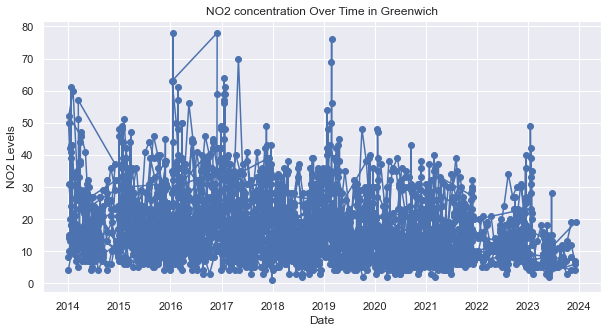

In [18]:
# Convert the 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Nitrogen dioxide'], marker='o')
plt.title('NO2 concentration Over Time in Greenwich')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.grid(True)
plt.show()

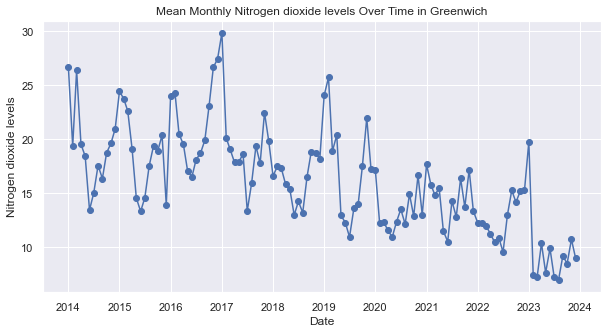

In [19]:
df_cleaned['YearMonth'] = df_cleaned['Date'].dt.to_period('M')

# Calculate mean NO2 levels for each month
monthly_mean_pollution = df_cleaned.groupby('YearMonth')['Nitrogen dioxide'].mean().reset_index()

# Convert 'YearMonth' to datetime format for plotting
monthly_mean_pollution['YearMonth'] = monthly_mean_pollution['YearMonth'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_pollution['YearMonth'], monthly_mean_pollution['Nitrogen dioxide'], marker='o')
plt.title('Mean Monthly Nitrogen dioxide levels Over Time in Greenwich')
plt.xlabel('Date')
plt.ylabel('Nitrogen dioxide levels')
plt.grid(True)
plt.show()

In [20]:
# Stationary or Non Stationary checking 
# Stationary or Non Stationary checking 


df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Group by 'Year' and 'Month' and calculate mean and variance for 'NO2 levels'
monthly_stats = df_cleaned.groupby(['Year', 'Month'])['Nitrogen dioxide'].agg(['mean', 'var']).reset_index()

# Display the result
print(monthly_stats)


     Year  Month       mean         var
0    2014      1  26.703704  227.370370
1    2014      2  19.375000  126.679348
2    2014      3  26.370370  204.319088
3    2014      4  19.538462   74.338462
4    2014      5  18.444444   77.871795
..    ...    ...        ...         ...
115  2023      8   7.000000    7.333333
116  2023      9   9.250000    7.583333
117  2023     10   8.500000   19.666667
118  2023     11  10.750000   40.916667
119  2023     12   9.000000   46.000000

[120 rows x 4 columns]


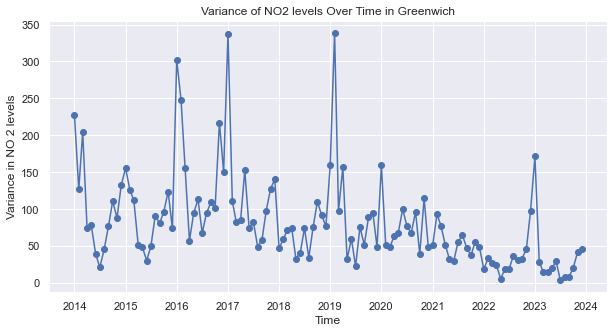

In [21]:
monthly_stats['YearMonth'] = pd.to_datetime(monthly_stats[['Year', 'Month']].assign(DAY=1))

# Plot the variance over time
plt.figure(figsize=(10, 5))
plt.plot(monthly_stats['YearMonth'], monthly_stats['var'], marker='o')
plt.title('Variance of NO2 levels Over Time in Greenwich')
plt.xlabel('Time')
plt.ylabel('Variance in NO 2 levels')
plt.grid(True)
plt.show()




In [22]:
monthly_stats.head()

,Year,Month,mean,var,YearMonth
0,2014,1,26.703704,227.370370,2014-01-01
1,2014,2,19.375000,126.679348,2014-02-01
2,2014,3,26.370370,204.319088,2014-03-01
3,2014,4,19.538462,74.338462,2014-04-01
4,2014,5,18.444444,77.871795,2014-05-01


In [23]:
df_1 = monthly_stats.copy()
columns_to_keep = ['mean', 'YearMonth']
df_1 = df_1[columns_to_keep]
df_1 = df_1.rename(columns={'mean': 'NO2 levels'})
df_1.head(10)

,NO2 levels,YearMonth
0,26.703704,2014-01-01
1,19.375000,2014-02-01
2,26.370370,2014-03-01
3,19.538462,2014-04-01
4,18.444444,2014-05-01
5,13.461538,2014-06-01
6,15.037037,2014-07-01
7,17.571429,2014-08-01
8,16.375000,2014-09-01
9,18.750000,2014-10-01


In [24]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO2 levels,120.0,16.230956,4.757437,7.0,12.951613,16.155242,19.073387,29.83871


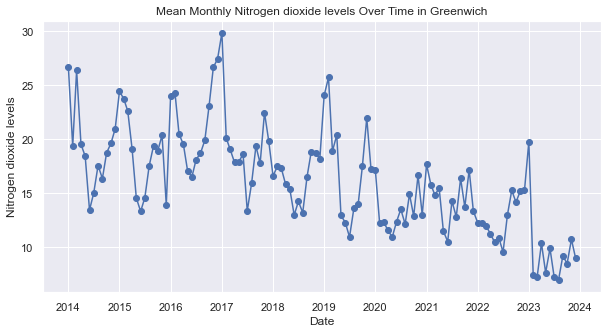

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df_1['YearMonth'], df_1['NO2 levels'], marker='o')
plt.title('Mean Monthly Nitrogen dioxide levels Over Time in Greenwich')
plt.xlabel('Date')
plt.ylabel('Nitrogen dioxide levels')
plt.grid(True)
plt.show()

In [26]:
df_1.shape

(120, 2)

In [27]:
df_1.head(24)

,NO2 levels,YearMonth
0,26.703704,2014-01-01
1,19.375000,2014-02-01
2,26.370370,2014-03-01
3,19.538462,2014-04-01
4,18.444444,2014-05-01
5,13.461538,2014-06-01
6,15.037037,2014-07-01
7,17.571429,2014-08-01
8,16.375000,2014-09-01
9,18.750000,2014-10-01


In [28]:
df_1['YearMonth'] = pd.to_datetime(df_1['YearMonth'])
df_1.set_index('YearMonth', inplace=True)
df_1.head()

,NO2 levels
YearMonth,
2014-01-01,26.703704
2014-02-01,19.375000
2014-03-01,26.370370
2014-04-01,19.538462
2014-05-01,18.444444


In [29]:
print(df_1.columns)


Index(['NO2 levels'], dtype='object')


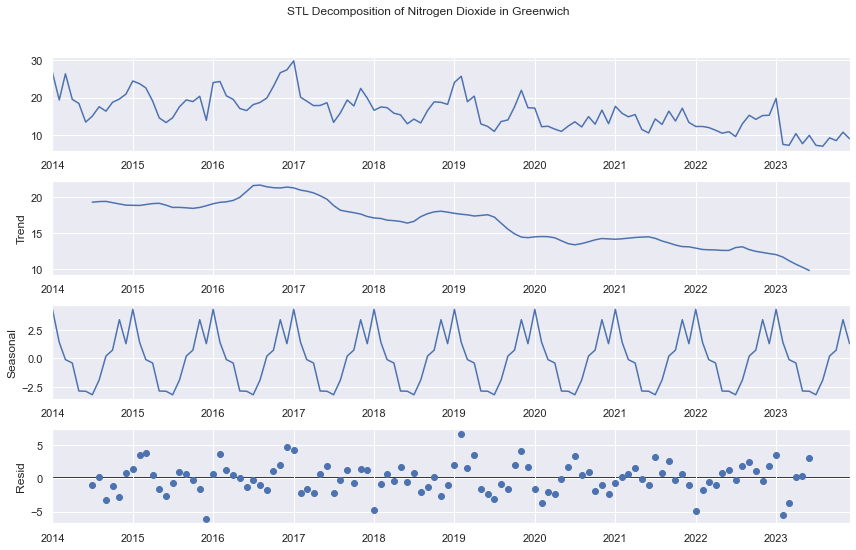

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_1 is your DataFrame and 'NO2 levels' is your column of interest
decomposition = seasonal_decompose(df_1['NO2 levels'], model='additive', period=12)

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)

# Set the main title for the entire figure and make it bold
fig.suptitle("STL Decomposition of Nitrogen Dioxide in Greenwich")

# Remove the automatic subplot titles
for ax in fig.axes:
    ax.set_title('')

# Adjust layout to make room for the title
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [31]:
# Augmented Dickey Fuller test (Hypothesis testing) using adfuller to prove whether the TS is stationary or non stationary

from statsmodels.tsa.stattools import adfuller 

def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series) #Hypothesis testing
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] < 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")
        
result = adf_check(df_1['NO2 levels'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.009112958474290575
p-value : 0.9577719309217017
#Lags Used : 9
Number of Observations Used : 110
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [32]:
df_G = df_1.copy()

In [54]:
df_G.head()

,NO2 levels
YearMonth,
2014-01-01,26.703704
2014-02-01,19.375000
2014-03-01,26.370370
2014-04-01,19.538462
2014-05-01,18.444444


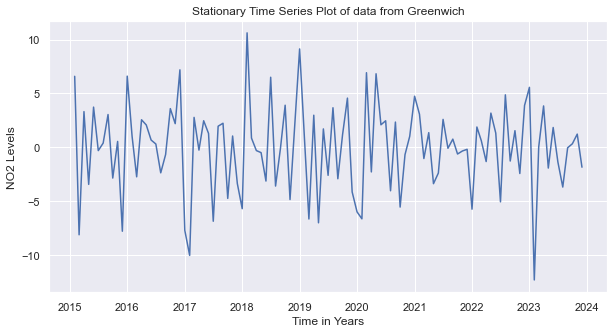

In [33]:
#To find the order of differencing 

#Here we have both seasonality and trend, so need to do both seasonal differencing and normal differencing

#SEASONAL DIFFERENCING ; dt = yt - yt-12

seasonality_removed = df_1['NO2 levels'] - df_1['NO2 levels'].shift(12)

#NORMAL DIFFERENCING ; kt= dt - dt-1

trend_and_seasonality_removed = seasonality_removed - seasonality_removed.shift(1)

#DROPPING NAN VALUES

trend_and_seasonality_removed = trend_and_seasonality_removed.dropna()
plt.figure(figsize=(10, 5))

# Plotting the data
plt.plot(trend_and_seasonality_removed.index, trend_and_seasonality_removed, label='NO2 Levels')

# Adding title and labels
plt.title('Stationary Time Series Plot of data from Greenwich')
plt.xlabel('Time in Years')
plt.ylabel('NO2 Levels')

# Displaying the plot
plt.show()

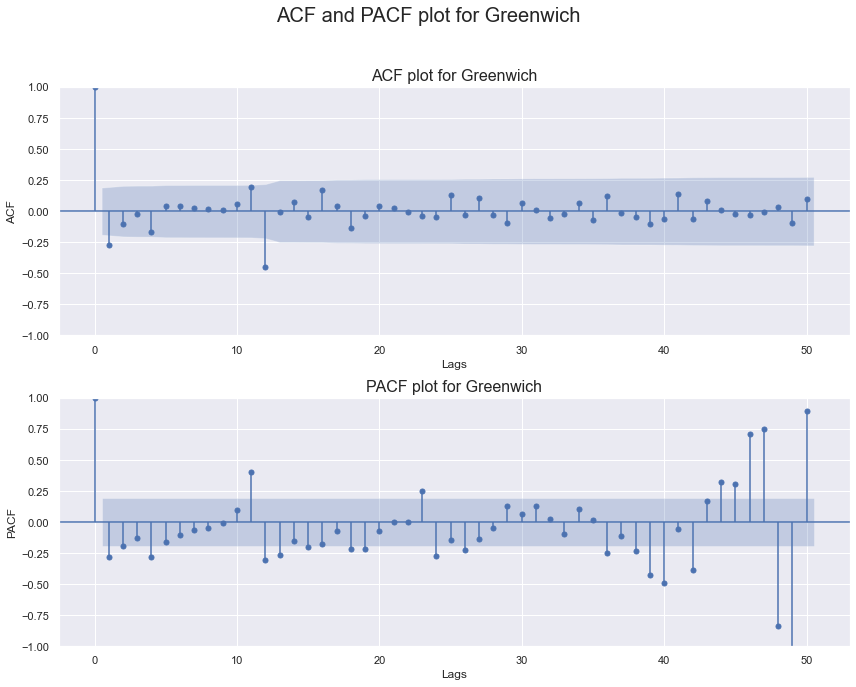

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create the figure and subplots
fig = plt.figure(figsize=(12, 10))

# ACF plot
ax1 = fig.add_subplot(211)
plot_acf(trend_and_seasonality_removed, lags=50, ax=ax1)
ax1.set_title("ACF plot for Greenwich", fontsize=16)
ax1.set_xlabel("Lags")
ax1.set_ylabel("ACF")

# PACF plot
ax2 = fig.add_subplot(212)
plot_pacf(trend_and_seasonality_removed, lags=50, ax=ax2)
ax2.set_title("PACF plot for Greenwich", fontsize=16)
ax2.set_xlabel("Lags")
ax2.set_ylabel("PACF")

# Overall title
fig.suptitle("ACF and PACF plot for Greenwich", fontsize=20)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure with a higher resolution
plt.savefig("ACF_PACF_Greenwich.png", dpi=300)

# Show the plot
plt.show()


In [35]:
result = adf_check(trend_and_seasonality_removed)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.651040837587343
p-value : 0.0048569528154936105
#Lags Used : 12
Number of Observations Used : 94
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [36]:
# Data is converted to stationary and the order of  normal differncing d= 1 and seasonal diffferencing D = 1.
# The estimates of p,P and q,Q cand be found from PACF and ACF plots respectively.

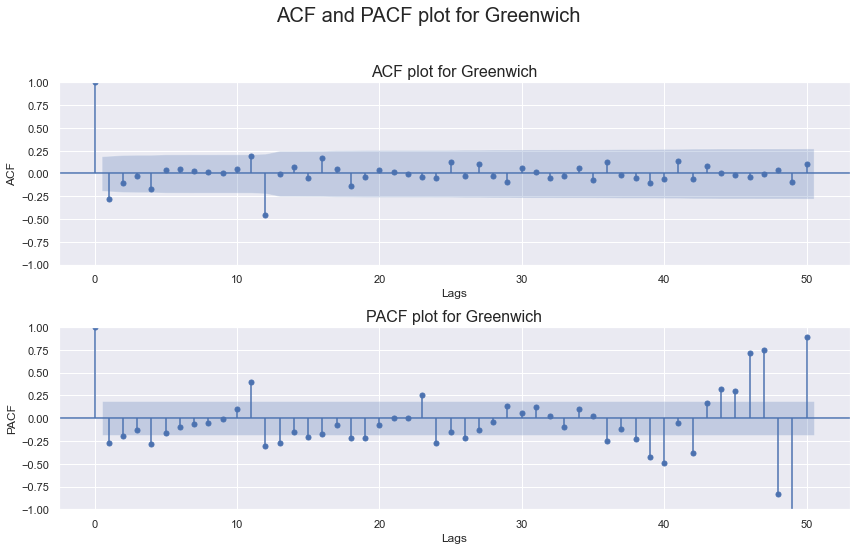

In [37]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create the figure and subplots
fig = plt.figure(figsize=(12, 8))

# ACF plot
ax1 = fig.add_subplot(211)
plot_acf(trend_and_seasonality_removed, lags=50, ax=ax1)
ax1.set_title("ACF plot for Greenwich", fontsize=16)
ax1.set_xlabel("Lags")
ax1.set_ylabel("ACF")

# PACF plot
ax2 = fig.add_subplot(212)
plot_pacf(trend_and_seasonality_removed, lags=50, ax=ax2)
ax2.set_title("PACF plot for Greenwich", fontsize=16)
ax2.set_xlabel("Lags")
ax2.set_ylabel("PACF")

# Overall title
fig.suptitle("ACF and PACF plot for Greenwich", fontsize=20)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure with a higher resolution
plt.savefig("ACF_PACF_Greenwich.png", dpi=300)

# Show the plot
plt.show()


From the PACF Plot, the most significant line before seasonality starts are at 1 and 4, 
so we can take p = 1. significant lines at lag 12, 24, 36, 48. It suggests that there are 
no significant seasonal autoregressive componenet . That is, P=4 

From ACF, the most significant line before seasonality starts is at 1, so q =1 and 
the most significant line for seasonal component is at  12, so Q = 1.

MODEL = SARIMA(1,1,1)(4,1,1)


In [38]:
def rmse(series1, series2):
  error = series1-series2
  se_error = error**2
  rmse_ = np.sqrt(np.mean(se_error))
  return rmse_

In [39]:
def mape(actual, predicted):
  error = actual-predicted
  abs_error = np.absolute(error)
  percent_abs_error = (abs_error/actual)*100
  mape_ = np.mean(percent_abs_error)
  return mape_

In [40]:
# MODELLING

model =sm.tsa.statespace.SARIMAX(df_1['NO2 levels'], 
                                order = (1,1,1),
                                seasonal_order = (4,1,3,12))

results= model.fit()
print(results.summary())
 
print('\n\n')
print('RMSE {}'.format(rmse(results.fittedvalues, df_1['NO2 levels'])))
print('MAPE {}'.format(mape(df_1['NO2 levels'], results.fittedvalues)))

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                 NO2 levels   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(4, 1, [1, 2, 3], 12)   Log Likelihood                -258.702
Date:                                    Mon, 02 Sep 2024   AIC                            537.403
Time:                                            03:25:21   BIC                            564.131
Sample:                                        01-01-2014   HQIC                           548.238
                                             - 12-01-2023                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4605      0.131      3.502      0

In [41]:
results.fittedvalues

YearMonth
2014-01-01     0.000000
2014-02-01    26.703641
2014-03-01    19.375006
2014-04-01    26.370340
2014-05-01    19.538480
                ...    
2023-08-01     8.860057
2023-09-01    10.383433
2023-10-01     8.608052
2023-11-01    12.832385
2023-12-01     7.926463
Length: 120, dtype: float64

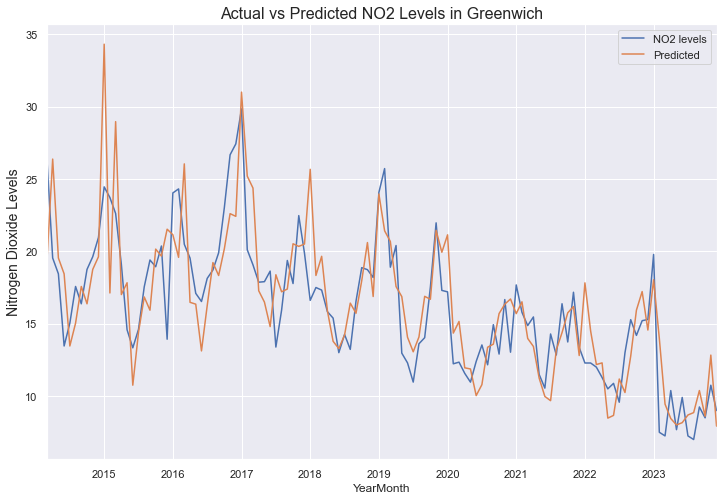

In [42]:
import matplotlib.pyplot as plt

# Add the 'Predicted' values to the DataFrame
df_1['Predicted'] = results.fittedvalues

# Create a temporary DataFrame excluding the first two rows
temp_df = df_1.iloc[2:, :]

# Plot the actual and predicted NO2 levels
ax = temp_df[['NO2 levels', 'Predicted']].plot(figsize=(12, 8))

# Add title and y-axis label
ax.set_title('Actual vs Predicted NO2 Levels in Greenwich', fontsize=16)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)

# Show the plot
plt.show()


In [43]:
# Hyper parameter tuning 

import itertools
import warnings

# Define the p, d and q parameters to take any value between 0 and 2
p = range(1, 5) ## experiment with p [0,1,2,3,4,5,6,,7,8,9]
q= [1]
d = [1]

seasonal_p = range(1,5)
seasonal_q = [1]
seasonal_d = [1] 
frequency=[12]

# Generate all different combinations of p, q and q triplets

pdq = list(itertools.product(p, d, q))  ####output = [(0,1,0), (0,1,1), (0,1,2)]

seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, frequency))  ###output= [(0,1,0,12), (0,1,1,12)]


# Generate all different combinations of seasonal p, q and q triplets
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0,4), range(1,3), range(0,3)))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_1['NO2 levels'],
                                            order=param,
                                            seasonal_order=param_seasonal)
                            

            results = mod.fit()

            print('SARIMA{}x{}12 - MAPE:{}'.format(param, param_seasonal, mape(df_1['NO2 levels'], results.fittedvalues)))
           
        except:
            continue

SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - MAPE:15.649021816298761
SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - MAPE:15.801005706973436
SARIMA(1, 1, 1)x(3, 1, 1, 12)12 - MAPE:15.900966793621462
SARIMA(1, 1, 1)x(4, 1, 1, 12)12 - MAPE:15.827632397409275
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - MAPE:15.642818685327159
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - MAPE:15.764848716850986
SARIMA(2, 1, 1)x(3, 1, 1, 12)12 - MAPE:15.911308953113998
SARIMA(2, 1, 1)x(4, 1, 1, 12)12 - MAPE:15.850248012073592
SARIMA(3, 1, 1)x(1, 1, 1, 12)12 - MAPE:15.572745154280168
SARIMA(3, 1, 1)x(2, 1, 1, 12)12 - MAPE:15.69750823725069
SARIMA(3, 1, 1)x(3, 1, 1, 12)12 - MAPE:15.889032421361494
SARIMA(3, 1, 1)x(4, 1, 1, 12)12 - MAPE:15.807634768209702
SARIMA(4, 1, 1)x(1, 1, 1, 12)12 - MAPE:15.542957111143762
SARIMA(4, 1, 1)x(2, 1, 1, 12)12 - MAPE:15.708008275104884
SARIMA(4, 1, 1)x(3, 1, 1, 12)12 - MAPE:15.86806124619977
SARIMA(4, 1, 1)x(4, 1, 1, 12)12 - MAPE:15.78610789485773


In [44]:
results_dict = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_1['NO2 levels'],
                                            order=param,
                                            seasonal_order=param_seasonal)
                            

            results = mod.fit()
            
            mape_results= mape(df_1['NO2 levels'], results.fittedvalues)
            results_dict[mape_results] = (param, param_seasonal)
        
           
        except:
            continue
            
filtered_sorted_dict = {k: v for k, v in sorted(results_dict.items()) if k < 15.8}
print(filtered_sorted_dict)


{15.542957111143762: ((4, 1, 1), (1, 1, 1, 12)), 15.572745154280168: ((3, 1, 1), (1, 1, 1, 12)), 15.642818685327159: ((2, 1, 1), (1, 1, 1, 12)), 15.649021816298761: ((1, 1, 1), (1, 1, 1, 12)), 15.69750823725069: ((3, 1, 1), (2, 1, 1, 12)), 15.708008275104884: ((4, 1, 1), (2, 1, 1, 12)), 15.764848716850986: ((2, 1, 1), (2, 1, 1, 12)), 15.78610789485773: ((4, 1, 1), (4, 1, 1, 12))}


In [45]:
#Modelling using best values of p,q,P,Q - SARIMA((1, 1, 1), (1, 1, 1, 12)) since thers no much difference between the best model in mape. less model complexity is preferred.


best_model =sm.tsa.statespace.SARIMAX(df_1['NO2 levels'], 
                                order = (1,1,1),
                                seasonal_order = (1,1,1,12))

best_result= best_model.fit()
print(best_result.summary())
 
print('\n\n')
print('RMSE {}'.format(rmse(best_result.fittedvalues, df_1['NO2 levels'])))
print('MAPE {}'.format(mape(df_1['NO2 levels'], best_result.fittedvalues)))


                                     SARIMAX Results                                      
Dep. Variable:                         NO2 levels   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -262.100
Date:                            Mon, 02 Sep 2024   AIC                            534.201
Time:                                    03:26:21   BIC                            547.565
Sample:                                01-01-2014   HQIC                           539.618
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4155      0.122      3.405      0.001       0.176       0.655
ma.L1         -0.9173      0.084   

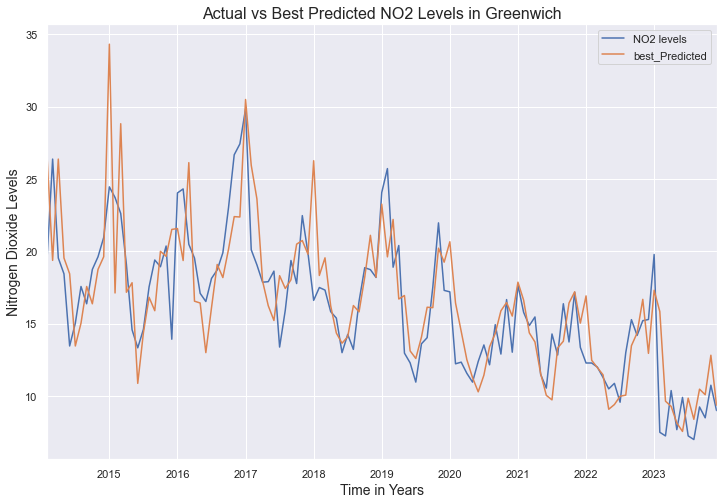

In [46]:
# comparing graphically original and predicted values graphically
import matplotlib.pyplot as plt

# Add the 'best_Predicted' values to the DataFrame
df_1['best_Predicted'] = best_result.fittedvalues

# Drop the 'Predicted' column and remove the first row
temp_df1 = df_1.drop('Predicted', axis=1)
temp_df1 = temp_df1.iloc[1:, :]

# Plot the actual and best predicted NO2 levels
ax = temp_df1[['NO2 levels', 'best_Predicted']].plot(figsize=(12, 8))

# Add title and y-axis label
ax.set_title('Actual vs Best Predicted NO2 Levels in Greenwich', fontsize=16)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)
ax.set_xlabel('Time in Years', fontsize=14)

# Show the plot
plt.show()



In [47]:
# predict values using best_model
df_1.head(10)

,NO2 levels,Predicted,best_Predicted
YearMonth,,,
2014-01-01,26.703704,0.000000,0.000000
2014-02-01,19.375000,26.703641,26.703635
2014-03-01,26.370370,19.375006,19.375009
2014-04-01,19.538462,26.370340,26.370338
2014-05-01,18.444444,19.538480,19.538483
2014-06-01,13.461538,18.444458,18.444459
2014-07-01,15.037037,13.461569,13.461570
2014-08-01,17.571429,15.037045,15.037043
2014-09-01,16.375000,17.571422,17.571420


In [48]:
# forecast values
print(best_result.forecast(24))

2024-01-01    11.863766
2024-02-01    10.185901
2024-03-01     9.268193
2024-04-01     8.791964
2024-05-01     6.509939
2024-06-01     6.251872
2024-07-01     6.543650
2024-08-01     7.552474
2024-09-01     9.925286
2024-10-01     9.481268
2024-11-01    12.036128
2024-12-01     9.868535
2025-01-01    12.522458
2025-02-01     8.012031
2025-03-01     7.152252
2025-04-01     7.510453
2025-05-01     5.108867
2025-06-01     5.448155
2025-07-01     5.018669
2025-08-01     5.719841
2025-09-01     8.062227
2025-10-01     7.543519
2025-11-01    10.024093
2025-12-01     7.958090
Freq: MS, Name: predicted_mean, dtype: float64


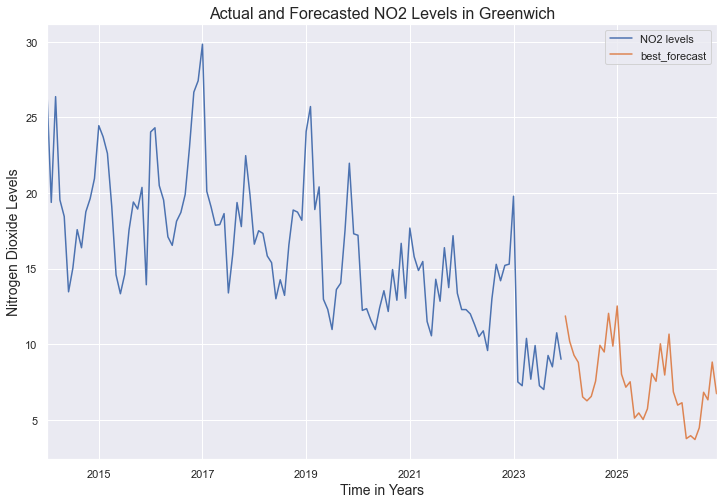

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Forecasting the next 36 values using the best model
forecasted_values = best_result.forecast(36)

# Concatenating the forecasted values to the original DataFrame
df_1 = pd.concat([df_1, pd.DataFrame(forecasted_values)], axis=1)

# Changing the default column name from 'predicted_mean' to 'best_forecast'
df_1.rename(columns={'predicted_mean': 'best_forecast'}, inplace=True)

# Plotting the actual and forecasted NO2 levels
ax = df_1[['NO2 levels', 'best_forecast']].plot(figsize=(12, 8))

# Adding title and y-axis label
ax.set_title('Actual and Forecasted NO2 Levels in Greenwich', fontsize=16)
ax.set_ylabel('Nitrogen Dioxide Levels', fontsize=14)
ax.set_xlabel('Time in Years', fontsize=14)

# Display the plot
plt.show()


In [50]:
df_1.tail()

,NO2 levels,Predicted,best_Predicted,best_forecast
2026-08-01,NaN,NaN,NaN,4.466748
2026-09-01,NaN,NaN,NaN,6.816539
2026-10-01,NaN,NaN,NaN,6.316008
2026-11-01,NaN,NaN,NaN,8.814660
2026-12-01,NaN,NaN,NaN,6.723934


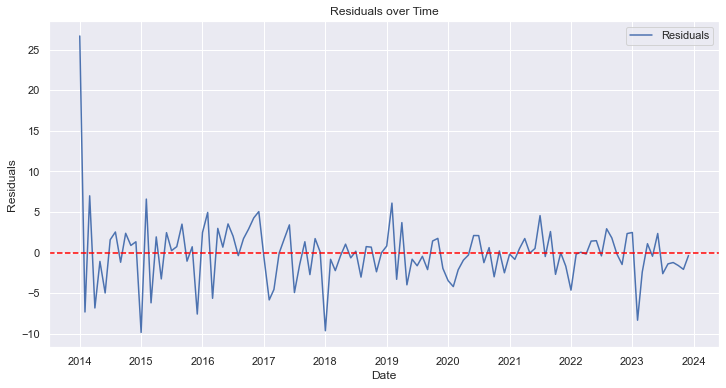

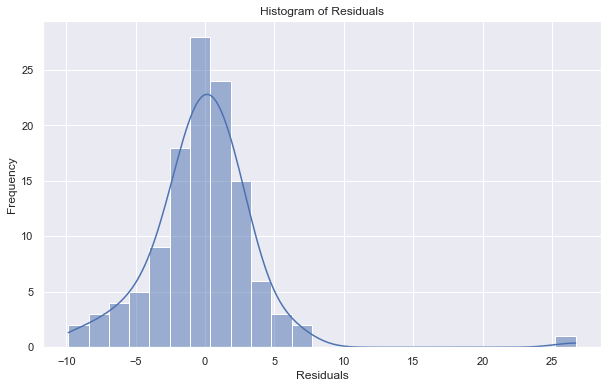

<Figure size 720x432 with 0 Axes>

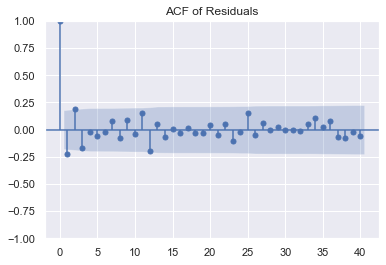

      lb_stat  lb_pvalue
10  17.507957   0.063853


In [51]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1. Calculate Residuals
df_1['Residuals'] = df_1['NO2 levels'] - df_1['best_Predicted']

# 2. Plot the Residuals over Time
plt.figure(figsize=(12, 6))
plt.plot(df_1.index, df_1['Residuals'], label='Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# 3. Plot the Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(df_1['Residuals'], kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 4. Plot the ACF of Residuals to Check for White Noise
plt.figure(figsize=(10, 6))
plot_acf(df_1['Residuals'].dropna(), lags=40)
plt.title('ACF of Residuals')
plt.show()

# 5. Perform Ljung-Box Test to check for autocorrelation
ljung_box_test = acorr_ljungbox(df_1['Residuals'].dropna(), lags=[10], return_df=True)
print(ljung_box_test)


In [52]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data
df_train, df_test = train_test_split(df_G, test_size=0.2, random_state=42)

# Building the SARIMAX model
model =sm.tsa.statespace.SARIMAX(df_train['NO2 levels'], 
                                order = (1,1,1),
                                seasonal_order = (1,1,1,12))

result= model.fit()

In [56]:
df_test.head()

,NO2 levels
YearMonth,
2017-09-01,19.366667
2017-12-01,19.870968
2014-05-01,18.444444
2018-08-01,13.225806
2016-03-01,20.483871


In [53]:
print(result.forecast(24))

96     15.993209
97     17.460097
98     14.301476
99     17.833159
100    14.129295
101    16.851601
102    20.851745
103    16.556021
104    14.283772
105    16.225964
106    15.973362
107    13.216637
108    15.028666
109    17.075801
110    14.730092
111    16.275226
112    15.087520
113    18.157098
114    20.234876
115    16.332754
116    15.788526
117    16.270739
118    15.965748
119    12.584072
Name: predicted_mean, dtype: float64


In [58]:
result.forecast(24)

96     15.993209
97     17.460097
98     14.301476
99     17.833159
100    14.129295
101    16.851601
102    20.851745
103    16.556021
104    14.283772
105    16.225964
106    15.973362
107    13.216637
108    15.028666
109    17.075801
110    14.730092
111    16.275226
112    15.087520
113    18.157098
114    20.234876
115    16.332754
116    15.788526
117    16.270739
118    15.965748
119    12.584072
Name: predicted_mean, dtype: float64

In [ ]:
'''''import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming hill_df is already loaded
# Split the data into train and test sets
df_train, df_test = train_test_split(hill_df, test_size=0.2, shuffle=False)

# Fit SARIMAX model on train data
model = SARIMAX(df_train['NO2 levels'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

# Forecast on the train data
train_forecast = model_fit.predict(start=0, end=len(df_train)-1)

# Display the forecasted train data
df_train['Forecasted NO2 levels'] = train_forecast
''''